In [10]:
from glob import glob

excel_files = glob('Air/*.xlsx')

In [11]:
excel_files

['Air\\2019년 01월.xlsx',
 'Air\\2019년 02월.xlsx',
 'Air\\2019년 03월.xlsx',
 'Air\\2019년 04월.xlsx',
 'Air\\2019년 05월.xlsx',
 'Air\\2019년 06월.xlsx',
 'Air\\2019년 07월.xlsx',
 'Air\\2019년 08월.xlsx',
 'Air\\2019년 09월.xlsx',
 'Air\\2019년 10월.xlsx',
 'Air\\2019년 11월.xlsx',
 'Air\\2019년 12월.xlsx',
 'Air\\2020년 10월.xlsx',
 'Air\\2020년 11월.xlsx',
 'Air\\2020년 12월.xlsx',
 'Air\\2020년 1월.xlsx',
 'Air\\2020년 2월.xlsx',
 'Air\\2020년 3월.xlsx',
 'Air\\2020년 4월.xlsx',
 'Air\\2020년 5월.xlsx',
 'Air\\2020년 6월.xlsx',
 'Air\\2020년 7월.xlsx',
 'Air\\2020년 8월.xlsx',
 'Air\\2020년 9월.xlsx',
 'Air\\2021년 10월.xlsx',
 'Air\\2021년 11월.xlsx',
 'Air\\2021년 12월.xlsx',
 'Air\\2021년 1월.xlsx',
 'Air\\2021년 2월.xlsx',
 'Air\\2021년 3월.xlsx',
 'Air\\2021년 4월.xlsx',
 'Air\\2021년 5월.xlsx',
 'Air\\2021년 6월.xlsx',
 'Air\\2021년 7월.xlsx',
 'Air\\2021년 8월.xlsx',
 'Air\\2021년 9월.xlsx',
 'Air\\2022년 10월.xlsx',
 'Air\\2022년 11월.xlsx',
 'Air\\2022년 12월.xlsx',
 'Air\\2022년 1월.xlsx',
 'Air\\2022년 2월.xlsx',
 'Air\\2022년 3월.xlsx',
 'Air\\2022년 

In [15]:
import pandas as pd
from tqdm.notebook import tqdm

total = pd.DataFrame() # 내보내기

for file in tqdm(excel_files):
    temp = pd.read_excel(file) # i 번째 파일을 불러와서 임시로 보관
    total = pd.concat([total,temp]) # temp를 내보내기 DataFrame에 넣기

total = total.reset_index(drop=True) #인덱스 없애기


  0%|          | 0/60 [00:00<?, ?it/s]

In [16]:
total

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2019010101,0.0030,0.70,0.0030,0.0540,39.0,24.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2019010102,0.0030,0.80,0.0020,0.0560,38.0,27.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2019010103,0.0030,0.90,0.0020,0.0570,42.0,28.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2019010104,0.0030,0.80,0.0020,0.0540,42.0,31.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2019010105,0.0030,0.80,0.0020,0.0480,49.0,33.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...,...
1752955,서울 노원구,도로변대기,111312,화랑로,2023093020,0.0025,0.45,0.0566,0.0170,44.0,21.0,서울 노원구 화랑로 429
1752956,서울 노원구,도로변대기,111312,화랑로,2023093021,0.0024,0.45,0.0542,0.0151,51.0,22.0,서울 노원구 화랑로 429
1752957,서울 노원구,도로변대기,111312,화랑로,2023093022,0.0022,0.46,0.0466,0.0155,50.0,22.0,서울 노원구 화랑로 429
1752958,서울 노원구,도로변대기,111312,화랑로,2023093023,0.0026,0.40,0.0428,0.0119,52.0,20.0,서울 노원구 화랑로 429


In [35]:
df = total.copy()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752960 entries, 0 to 1752959
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역      object 
 1   망       object 
 2   측정소코드   int64  
 3   측정소명    object 
 4   측정일시    int64  
 5   SO2     float64
 6   CO      float64
 7   O3      float64
 8   NO2     float64
 9   PM10    float64
 10  PM25    float64
 11  주소      object 
dtypes: float64(6), int64(2), object(4)
memory usage: 160.5+ MB


In [36]:
df['측정일시'] = df['측정일시'].astype(str) #시간데이터 자르기 위해 문자로 변경

In [37]:
df['측정일시'] = df['측정일시'].str[:8]

In [38]:
df = df.drop(['측정소코드','측정소명','주소'], axis=1) #필요없는 행 없애기

In [39]:
df['지역'] = df['지역'].str[3:]

In [40]:
df

,지역,망,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,중구,도시대기,20190101,0.0030,0.70,0.0030,0.0540,39.0,24.0
1,중구,도시대기,20190101,0.0030,0.80,0.0020,0.0560,38.0,27.0
2,중구,도시대기,20190101,0.0030,0.90,0.0020,0.0570,42.0,28.0
3,중구,도시대기,20190101,0.0030,0.80,0.0020,0.0540,42.0,31.0
4,중구,도시대기,20190101,0.0030,0.80,0.0020,0.0480,49.0,33.0
...,...,...,...,...,...,...,...,...,...
1752955,노원구,도로변대기,20230930,0.0025,0.45,0.0566,0.0170,44.0,21.0
1752956,노원구,도로변대기,20230930,0.0024,0.45,0.0542,0.0151,51.0,22.0
1752957,노원구,도로변대기,20230930,0.0022,0.46,0.0466,0.0155,50.0,22.0
1752958,노원구,도로변대기,20230930,0.0026,0.40,0.0428,0.0119,52.0,20.0


In [43]:
df = df.groupby(['지역', '망', '측정일시'], as_index=False).mean()

In [46]:
df

,지역,망,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,강남구,도로변대기,20190101,0.003667,1.087500,0.013750,0.025125,37.833333,21.625000
1,강남구,도로변대기,20190102,0.004083,1.191667,0.010667,0.030542,34.583333,17.875000
2,강남구,도로변대기,20190103,0.004292,1.441667,0.005958,0.036917,38.652174,18.958333
3,강남구,도로변대기,20190104,0.004783,1.569565,0.004609,0.048391,64.695652,41.521739
4,강남구,도로변대기,20190105,0.004375,0.745833,0.011583,0.028792,67.208333,39.000000
...,...,...,...,...,...,...,...,...,...
73035,중랑구,도시대기,20231227,0.002900,0.711364,0.010323,0.044173,58.500000,46.727273
73036,중랑구,도시대기,20231228,0.003017,0.805000,0.009388,0.043238,48.083333,39.458333
73037,중랑구,도시대기,20231229,0.002625,0.560000,0.012875,0.033487,37.708333,30.500000
73038,중랑구,도시대기,20231230,0.002263,0.541250,0.012854,0.028279,34.500000,28.833333


In [48]:
df.to_excel("2019_2023_미세먼지데이터_망구분.xlsx",index=False)

In [96]:
df_mang = pd.read_excel("2019_2023_미세먼지데이터_망구분.xlsx")

In [97]:
df_mang.isnull().sum()

지역         0
망          0
측정일시       0
SO2     1056
CO      1258
O3       746
NO2      924
PM10    1413
PM25    1426
dtype: int64

In [98]:
df_mang[df_mang.isna( ).any(axis=1)] 

,지역,망,측정일시,SO2,CO,O3,NO2,PM10,PM25
35,강남구,도로변대기,20190205,0.004125,1.020833,0.009417,NaN,94.416667,29.208333
36,강남구,도로변대기,20190206,0.004417,0.987500,0.011083,NaN,102.625000,35.875000
136,강남구,도로변대기,20190517,0.005250,NaN,0.027542,0.056542,70.666667,44.416667
142,강남구,도로변대기,20190523,0.007833,NaN,0.063000,0.040381,90.875000,51.500000
143,강남구,도로변대기,20190524,0.007083,NaN,0.059333,0.047500,104.913043,61.958333
...,...,...,...,...,...,...,...,...,...
72899,중랑구,도시대기,20230813,0.002025,NaN,0.033892,0.006988,29.083333,19.333333
72900,중랑구,도시대기,20230814,0.002054,NaN,0.037683,0.008954,41.416667,29.166667
72901,중랑구,도시대기,20230815,0.002008,NaN,0.030954,0.005462,24.791667,16.291667
72902,중랑구,도시대기,20230816,0.002100,NaN,0.032346,0.010125,16.708333,10.416667


In [71]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rcParams # 한글 환경 설정을 위한 rcParams 임포트
import warnings

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

<Axes: xlabel='지역', ylabel='PM10'>

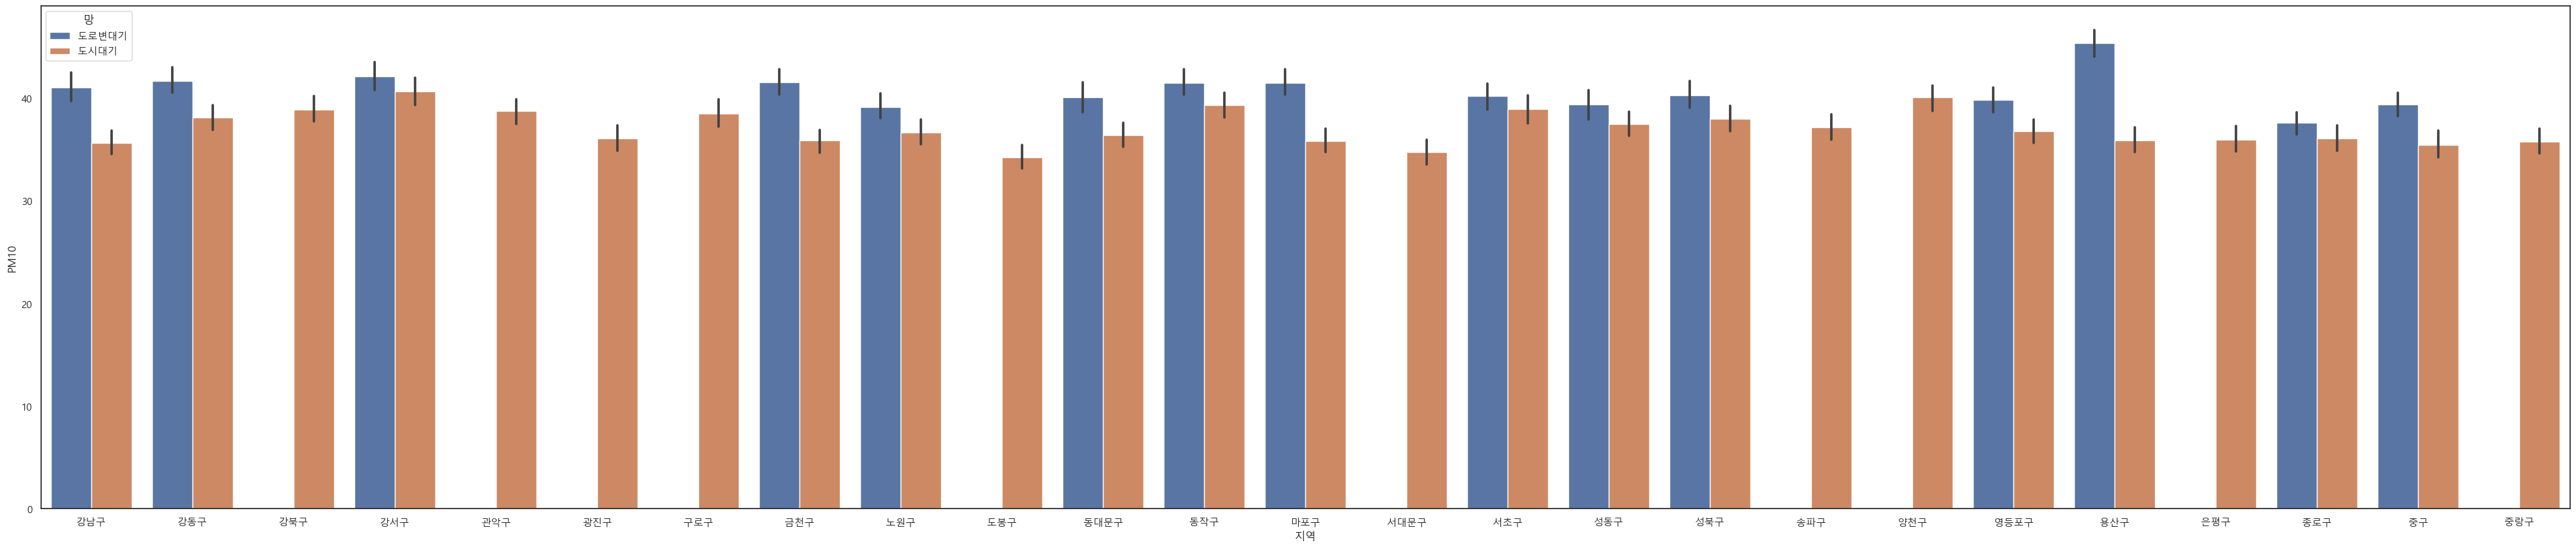

In [72]:
plt.figure(figsize = (50,10))
sns.barplot(x="지역", y="PM10", data=df_mang, hue='망')

미세먼지 기준 어느정도 차이가 있는 것으로 확인되나 도로변대기 측정소가 존재하지 않는 구가 10개나 존재하여, 유의미한 비교 어려울 것으로 판단...
결측값 또한 2943행 있어서 인접구 평균으로 하기엔 인접구 값도 NULL일 확률 높음.
망을 제외하고 구로 묶어서 데이터를 활용하는 것이 나을 것 같음.

In [50]:
df = df.drop(['망'],axis = 1) #망구분제거

In [52]:
df_nomang = df.groupby(['지역', '측정일시'], as_index=False).mean() #다시 지역/일별 평균 구하기

In [54]:
df_nomang.isnull().sum()

지역        0
측정일시      0
SO2     259
CO      300
O3      110
NO2     128
PM10    116
PM25    105
dtype: int64

In [55]:
df_nomang.to_excel("2019_2023_미세먼지데이터_구별.xlsx",index=False)

In [58]:
df_nomang[df_nomang.isna( ).any(axis=1)]  #결측값 포함된 행 확인

,지역,측정일시,SO2,CO,O3,NO2,PM10,PM25
291,강남구,20191019,NaN,0.479167,0.030458,0.040875,23.125000,10.458333
292,강남구,20191020,NaN,0.670833,0.028542,0.051333,38.791667,21.750000
293,강남구,20191021,NaN,0.766667,0.024375,0.066208,41.083333,22.375000
294,강남구,20191022,NaN,0.691667,0.020375,0.064958,38.250000,20.750000
3688,강북구,20190206,0.003917,0.700000,0.017750,NaN,105.791667,35.041667
...,...,...,...,...,...,...,...,...
45509,중랑구,20230813,0.002025,NaN,0.033892,0.006988,29.083333,19.333333
45510,중랑구,20230814,0.002054,NaN,0.037683,0.008954,41.416667,29.166667
45511,중랑구,20230815,0.002008,NaN,0.030954,0.005462,24.791667,16.291667
45512,중랑구,20230816,0.002100,NaN,0.032346,0.010125,16.708333,10.416667


In [77]:
adjacent_districts = {
    '종로구': ['중구', '서대문구', '성북구', '동대문구', '은평구'],
    '중구': ['종로구', '성동구', '용산구', '서대문구'],
    '용산구': ['중구', '서초구', '동작구', '영등포구', '마포구'],
    '성동구': ['중구', '광진구', '동대문구', '성북구', '강남구'],
    '광진구': ['성동구', '중랑구', '동대문구', '강동구'],
    '동대문구': ['종로구', '성동구', '광진구', '성북구', '중랑구'],
    '중랑구': ['동대문구', '광진구', '성북구', '노원구', '강북구'],
    '성북구': ['종로구', '동대문구', '중랑구', '강북구', '도봉구', '은평구'],
    '강북구': ['성북구', '도봉구', '중랑구'],
    '도봉구': ['성북구', '강북구', '노원구'],
    '노원구': ['도봉구', '중랑구', '성북구', '강북구'],
    '은평구': ['종로구', '서대문구', '마포구', '성북구'],
    '서대문구': ['종로구', '중구', '용산구', '마포구', '은평구'],
    '마포구': ['은평구', '서대문구', '용산구', '영등포구'],
    '양천구': ['강서구', '구로구', '영등포구'],
    '강서구': ['양천구', '구로구', '영등포구', '마포구'],
    '구로구': ['양천구', '강서구', '금천구', '영등포구'],
    '금천구': ['구로구', '관악구', '동작구'],
    '영등포구': ['양천구', '강서구', '구로구', '용산구', '마포구'],
    '동작구': ['용산구', '서초구', '관악구', '금천구'],
    '관악구': ['동작구', '서초구', '금천구'],
    '서초구': ['동작구', '용산구', '강남구', '송파구'],
    '강남구': ['서초구', '송파구', '성동구', '서초구'],
    '송파구': ['강남구', '서초구', '강동구'],
    '강동구': ['송파구', '강남구', '광진구']
}


# 결측값 채우기 함수
def fill_missing_with_neighbors_mean(df, adj_districts):
    for date in df['측정일시'].unique():
        for district in df['지역'].unique():
            mask = (df['측정일시'] == date) & (df['지역'] == district)
            if df.loc[mask, 'SO2'].isna().any():
                neighbors = adj_districts[district]
                neighbor_values = df[(df['측정일시'] == date) & (df['지역'].isin(neighbors))]['SO2']
                mean_value = neighbor_values.mean()
                df.loc[mask, 'SO2'] = mean_value
                
            elif df.loc[mask, 'CO'].isna().any():
                neighbors = adj_districts[district]
                neighbor_values = df[(df['측정일시'] == date) & (df['지역'].isin(neighbors))]['CO']
                mean_value = neighbor_values.mean()
                df.loc[mask, 'CO'] = mean_value
            
            elif df.loc[mask, 'O3'].isna().any():
                neighbors = adj_districts[district]
                neighbor_values = df[(df['측정일시'] == date) & (df['지역'].isin(neighbors))]['O3']
                mean_value = neighbor_values.mean()
                df.loc[mask, 'O3'] = mean_value
            
            elif df.loc[mask, 'NO2'].isna().any():
                neighbors = adj_districts[district]
                neighbor_values = df[(df['측정일시'] == date) & (df['지역'].isin(neighbors))]['NO2']
                mean_value = neighbor_values.mean()
                df.loc[mask, 'NO2'] = mean_value
            
            elif df.loc[mask, 'PM10'].isna().any():
                neighbors = adj_districts[district]
                neighbor_values = df[(df['측정일시'] == date) & (df['지역'].isin(neighbors))]['PM10']
                mean_value = neighbor_values.mean()
                df.loc[mask, 'PM10'] = mean_value
            
            elif df.loc[mask, 'PM25'].isna().any():
                neighbors = adj_districts[district]
                neighbor_values = df[(df['측정일시'] == date) & (df['지역'].isin(neighbors))]['PM25']
                mean_value = neighbor_values.mean()
                df.loc[mask, 'PM25'] = mean_value
            
    return df

df_filled = fill_missing_with_neighbors_mean(df_nomang, adjacent_districts)

In [78]:
df_filled

,지역,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,강남구,20190101,0.004437,0.841667,0.013542,0.025854,36.416667,25.708333
1,강남구,20190102,0.004854,0.900000,0.009833,0.031917,33.074275,21.828804
2,강남구,20190103,0.004964,1.102652,0.004911,0.040640,38.901087,24.388258
3,강남구,20190104,0.005558,1.247283,0.004013,0.048946,61.451993,44.906703
4,강남구,20190105,0.005167,0.685417,0.012458,0.027854,63.625000,41.854167
...,...,...,...,...,...,...,...,...
45645,중랑구,20231227,0.002900,0.711364,0.010323,0.044173,58.500000,46.727273
45646,중랑구,20231228,0.003017,0.805000,0.009388,0.043238,48.083333,39.458333
45647,중랑구,20231229,0.002625,0.560000,0.012875,0.033487,37.708333,30.500000
45648,중랑구,20231230,0.002263,0.541250,0.012854,0.028279,34.500000,28.833333


In [79]:
df_filled.isnull().sum()

지역        0
측정일시      0
SO2       0
CO      114
O3       83
NO2      86
PM10     79
PM25    100
dtype: int64

In [80]:
df_filled[df_nomang.isna( ).any(axis=1)] #행내에서 결측값이 다수일 경우 제일 처음 결측값만 채워짐

,지역,측정일시,SO2,CO,O3,NO2,PM10,PM25
3911,강북구,20190917,0.004313,NaN,NaN,NaN,27.333333,12.888889
5824,강서구,20191213,0.005167,0.633333,0.003875,0.040667,28.791667,NaN
7546,관악구,20190831,0.004292,0.341667,0.032667,0.016792,17.888889,NaN
7547,관악구,20190901,0.004417,0.412500,0.028792,0.023125,19.575126,NaN
7548,관악구,20190902,0.004125,0.425000,0.010250,0.030875,27.500518,NaN
...,...,...,...,...,...,...,...,...
44119,중랑구,20191023,0.002792,NaN,NaN,NaN,NaN,NaN
44164,중랑구,20191207,0.003525,NaN,NaN,NaN,NaN,NaN
44165,중랑구,20191208,0.003296,NaN,NaN,NaN,NaN,NaN
44269,중랑구,20200321,0.003575,NaN,NaN,NaN,NaN,NaN


In [85]:
def fill_all_column(df, adj_districts):
    columns_to_fill = ['CO', 'O3', 'NO2', 'PM10', 'PM25']  # 결측값을 채울 컬럼 리스트
    
    for date in df['측정일시'].unique():
        for district in df['지역'].unique():
            mask = (df['측정일시'] == date) & (df['지역'] == district)
            for column in columns_to_fill:
                if df.loc[mask, column].isna().any():
                    neighbors = adj_districts[district]
                    neighbor_values = df[(df['측정일시'] == date) & (df['지역'].isin(neighbors))][column]
                    mean_value = neighbor_values.mean()
                    df.loc[mask, column] = mean_value
    return df

df_filled = fill_all_column(df_filled, adjacent_districts)

In [86]:
df_filled.isnull().sum() #깰꼼

지역      0
측정일시    0
SO2     0
CO      0
O3      0
NO2     0
PM10    0
PM25    0
dtype: int64

In [87]:
df_filled

,지역,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,강남구,20190101,0.004437,0.841667,0.013542,0.025854,36.416667,25.708333
1,강남구,20190102,0.004854,0.900000,0.009833,0.031917,33.074275,21.828804
2,강남구,20190103,0.004964,1.102652,0.004911,0.040640,38.901087,24.388258
3,강남구,20190104,0.005558,1.247283,0.004013,0.048946,61.451993,44.906703
4,강남구,20190105,0.005167,0.685417,0.012458,0.027854,63.625000,41.854167
...,...,...,...,...,...,...,...,...
45645,중랑구,20231227,0.002900,0.711364,0.010323,0.044173,58.500000,46.727273
45646,중랑구,20231228,0.003017,0.805000,0.009388,0.043238,48.083333,39.458333
45647,중랑구,20231229,0.002625,0.560000,0.012875,0.033487,37.708333,30.500000
45648,중랑구,20231230,0.002263,0.541250,0.012854,0.028279,34.500000,28.833333


In [91]:
df_end = df_filled.rename(columns={'측정일시':'날짜'})

In [92]:
df_end.to_excel("2019_2023_미세먼지데이터_결측값처리.xlsx",index=False)

In [95]:
df_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45650 entries, 0 to 45649
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      45650 non-null  object 
 1   날짜      45650 non-null  object 
 2   SO2     45650 non-null  float64
 3   CO      45650 non-null  float64
 4   O3      45650 non-null  float64
 5   NO2     45650 non-null  float64
 6   PM10    45650 non-null  float64
 7   PM25    45650 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.8+ MB
